# **Imports**

In [1]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D,Dropout
from keras import Input, Model, Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# **Constants**

In [2]:
encoding_dim = 32

# **Function to plot images**

In [3]:
def plot_images(model,x_test):
  predictions = model.predict(x_test)
  plt.figure(figsize=(20, 4))
  for i in range(5):
      # Display original
      ax = plt.subplot(2, 5, i + 1)
      plt.imshow(x_test[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      # Display reconstruction
      ax = plt.subplot(2, 5, i + 1 + 5)
      plt.imshow(predictions[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

# **Simple autoencoder**

(60000, 784)
(10000, 784)


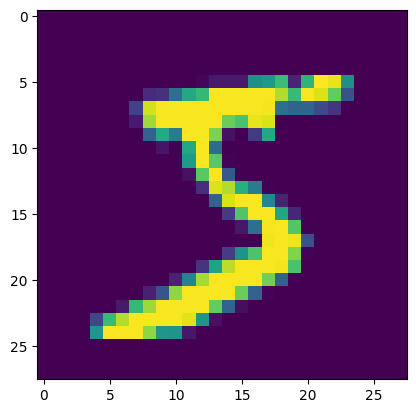

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)
plt.imshow(x_train[0].reshape(28,28))

In [5]:
input_img = Input(shape=(784,))
# encoded representation of input
encoded = Dense(784, activation='PReLU')(input_img)
encoded = Dense(encoding_dim, activation='PReLU')(encoded)
# decoded representation of code 
decoded = Dense(784, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)

# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=5, batch_size=16, validation_data=(x_test, x_test))

Epoch 1/5
3750/3750 [==============================] - 29s 6ms/step - loss: 0.1162 - val_loss: 0.0879
Epoch 2/5
3750/3750 [==============================] - 17s 4ms/step - loss: 0.0861 - val_loss: 0.0829
Epoch 3/5
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0829 - val_loss: 0.0811
Epoch 4/5
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0815 - val_loss: 0.0803
Epoch 5/5
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0806 - val_loss: 0.0796


313/313 [==============================] - 0s 1ms/step


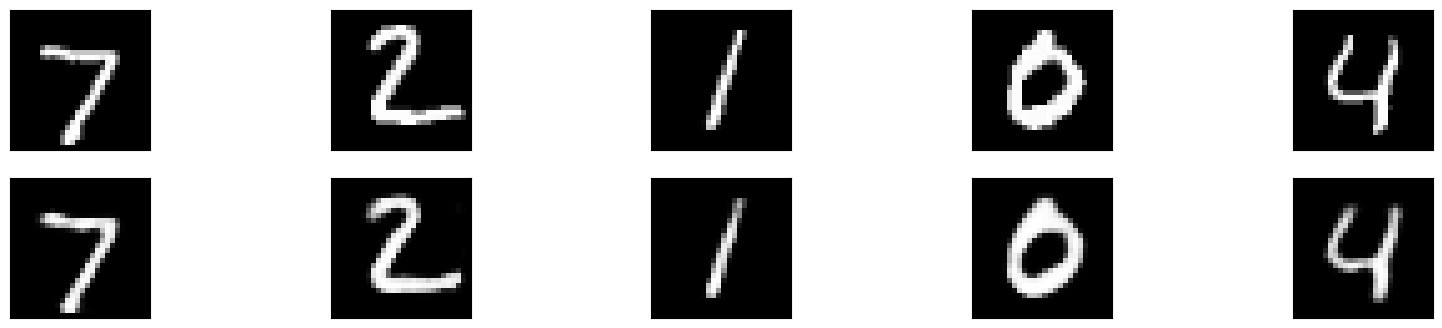

In [6]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# **Deep CNN Autoencoder**

CNN encodes image input using Conv2D + max-pooling. Decoder = Conv2D + Upsamp.

In [7]:
model = Sequential()
# encoder network
model.add(Conv2D(32, 3, activation= 'PReLU', padding='same', input_shape = (28,28,1)))
model.add(Conv2D(64, 3, activation= 'PReLU', padding='same'))
model.add(Conv2D(128, 3, activation= 'PReLU', padding='same'))
model.add(Conv2D(64, 3, activation= 'PReLU', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(encoding_dim, 3, activation= 'PReLU', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))
#decoder network
model.add(Conv2D(encoding_dim, 3, activation= 'PReLU', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(64, 3, activation= 'PReLU', padding='same'))
model.add(Conv2D(128, 3, activation= 'PReLU', padding='same'))
model.add(Conv2D(64, 3, activation= 'PReLU', padding='same'))
model.add(Conv2D(16, 3, activation= 'PReLU', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
model.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 41s 66ms/step - loss: 0.1098 - val_loss: 0.0698
Epoch 2/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0685 - val_loss: 0.0667
Epoch 3/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0658 - val_loss: 0.0654
Epoch 4/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0645 - val_loss: 0.0634
Epoch 5/10
469/469 [==============================] - 29s 63ms/step - loss: 0.0638 - val_loss: 0.0631
Epoch 6/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0633 - val_loss: 0.0625
Epoch 7/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0629 - val_loss: 0.0621
Epoch 8/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0625 - val_loss: 0.0618
Epoch 9/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0622 - val_loss: 0.0614
Epoch 10/10
469/469 [==============================] - 29s 63ms/step - loss: 0.061

313/313 [==============================] - 2s 6ms/step


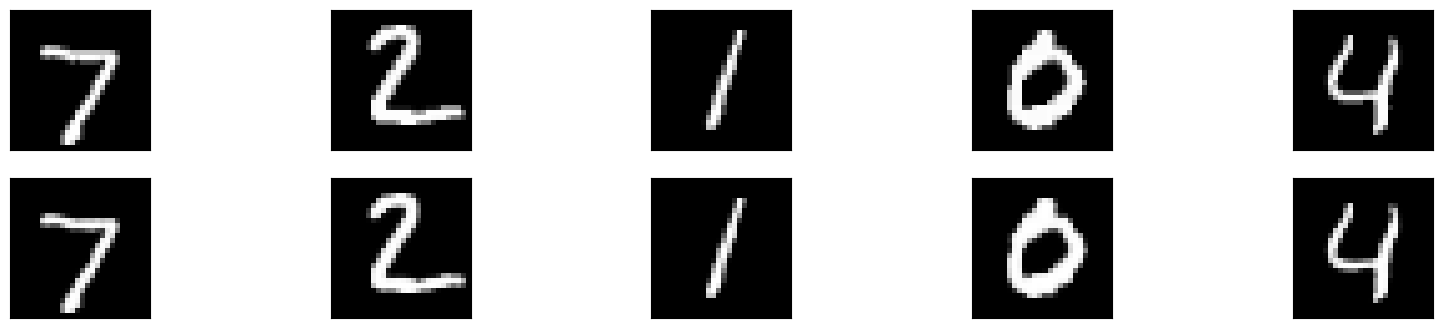

In [8]:
plot_images(model,x_test)

# **Denoising Autoencoder**

Let's test the model's noise tolerance with blurry, discolored, or marked images.

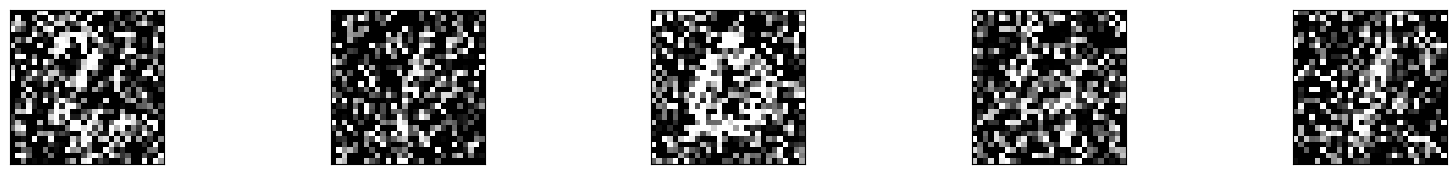

In [9]:
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

To enhance the autoencoder's extent, we'll adjust the model layers to improve performance and fit it as the images are scarcely identifiable.

In [10]:
model = Sequential()
# encoder network
model.add(Conv2D(64, 3, activation= 'PReLU', padding='same', input_shape = (28,28,1)))
model.add(Dropout(0.2))
model.add(Conv2D(128, 3, activation= 'PReLU', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(256, 3, activation= 'PReLU', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, 3, activation= 'PReLU', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, 3, activation= 'PReLU', padding='same'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(encoding_dim, 3, activation= 'PReLU', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))
#decoder network
model.add(Conv2D(encoding_dim, 3, activation= 'PReLU', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(64, 3, activation= 'PReLU', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, 3, activation= 'PReLU', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(256, 3, activation= 'PReLU', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, 3, activation= 'PReLU', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, 3, activation= 'PReLU', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, 3, activation= 'PReLU', padding='same'))
model.add(Conv2D(16, 3, activation= 'PReLU', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
model.fit(x_train_noisy, x_train, epochs=10, batch_size=128, validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 [==============================] - 92s 171ms/step - loss: 0.2216 - val_loss: 0.1349
Epoch 2/10
469/469 [==============================] - 77s 165ms/step - loss: 0.1255 - val_loss: 0.1247
Epoch 3/10
469/469 [==============================] - 77s 165ms/step - loss: 0.1204 - val_loss: 0.1187
Epoch 4/10
469/469 [==============================] - 76s 162ms/step - loss: 0.1175 - val_loss: 0.1145
Epoch 5/10
469/469 [==============================] - 77s 165ms/step - loss: 0.1156 - val_loss: 0.1149
Epoch 6/10
469/469 [==============================] - 76s 162ms/step - loss: 0.1142 - val_loss: 0.1125
Epoch 7/10
469/469 [==============================] - 76s 162ms/step - loss: 0.1128 - val_loss: 0.1109
Epoch 8/10
469/469 [==============================] - 76s 162ms/step - loss: 0.1118 - val_loss: 0.1094
Epoch 9/10
469/469 [==============================] - 77s 165ms/step - loss: 0.1109 - val_loss: 0.1096
Epoch 10/10
469/469 [==============================] - 76s 162ms/step - l

313/313 [==============================] - 5s 13ms/step


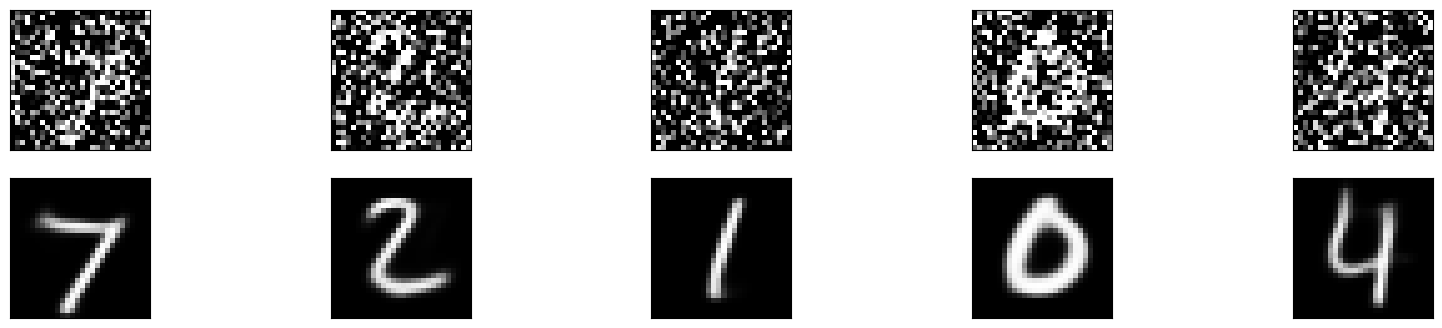

In [11]:
plot_images(model,x_test_noisy)

313/313 [==============================] - 0s 1ms/step


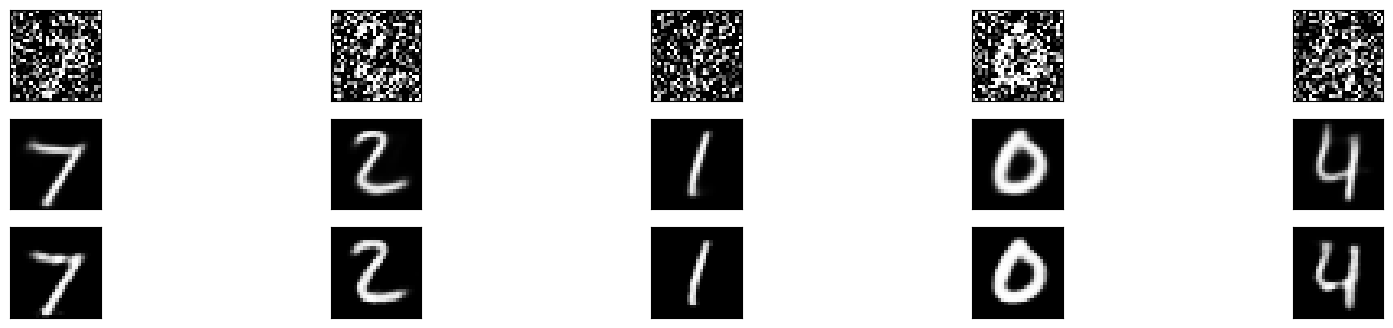

In [21]:
predictions = np.reshape(model.predict(x_test_noisy), (len(model.predict(x_test_noisy)), 784))
encoded_img = encoder.predict(predictions)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction with Denoising Autoencoder
    ax = plt.subplot(3, 5, i + 1 + 5)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction with Denoising Autoencoder and simple auto encoder
    ax = plt.subplot(3, 5, i + 1 + 10)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()